# Magsano, Niño Matthew
### In collab with Antoinette Argonza

In [85]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn.preprocessing import OneHotEncoder

For this assignment you will be creating 2 models. One using KNN and another using Linear Regression. The dataset to be used for this will be the Campus Placement dataset (https://www.kaggle.com/benroshan/factors-affecting-campus-placement). The dataset contains 15 features these are:

- sl_no - serial # of unique identifier for student 
- gender - gender of student 
- ssc_p - Secondary Education percentage- 10th Grade
- ssc_b - Board of Education- Central/ Others
- hsc_p - Higher Secondary Education percentage- 12th Grade
- hsc_b - Board of Education- Central/ Others
- hsc_s - Specialization in Higher Secondary Education
- degree_p - Degree Percentage
- degree_t - Under Graduation(Degree type)- Field of degree education
- workex - Work Experience yes/no
- etest_p - Employability test percentage ( conducted by college)
- specialisation - Post Graduation(MBA)- Specialization
- mba_p - MBA percentage
- status - Status of placement- Placed/Not placed
- salary - Salary offered by corporate to candidates

For the classification assignment we will be using the `status feature` as our target while for our regression problem it will be the `salary feature`.

We load the data and try to see the different features that we have. We can observe that there are categorical features. This means we have to do some data preprocessing first before we load our data to the model.

In [2]:
placement_df = pd.read_csv("data/Placement_Data_Full_Class.csv")
placement_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
placement_df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


The dataset is pretty clean except for our salary feature. This means that when we build our regression model we have to remove the missing values

In [4]:
placement_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
placement_df.hsc_b.unique()

array(['Others', 'Central'], dtype=object)

# Data Preprocessing

For us to load the data to the model we have to convert our categorical features into numeric. For features with only 2 categories we converted them to 1's and 0's while for those with more than 2. One hot encoding was done. 

In [6]:
model_data = placement_df.copy(deep=True)

#remove sl_no column from the model data
model_data.drop("sl_no", inplace=True, axis=1)
#convert gender to numeric 
model_data.gender = model_data.gender.apply(lambda x: 1 if x == 'F' else 0)
#convert ssc_b, hsc_b to numeric
model_data.ssc_b = model_data.ssc_b.apply(lambda x: 1 if x == 'Central' else 0)
model_data.hsc_b = model_data.ssc_b.apply(lambda x: 1 if x == 'Central' else 0)
#convert workex to numeric
model_data.workex = model_data.workex.apply(lambda x: 1 if x == 'Yes' else 0)
#convert status to numeric
model_data.status = model_data.status.apply(lambda x: 1 if x == 'Placed' else 0)

#one hot encode features with multiple categories 
multi_categorical_features = ['hsc_s', 'degree_t', 'specialisation']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

#model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

model_data.to_csv("data/Model_Data.csv")

model_data.head()

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,salary,x0_Arts,x0_Commerce,x0_Science,x1_Comm&Mgmt,x1_Others,x1_Sci&Tech,x2_Mkt&Fin,x2_Mkt&HR
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,...,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,...,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,65.00,1,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,...,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,56.00,1,52.00,0,Science,52.00,Sci&Tech,0,66.0,...,0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,85.80,1,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,...,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


**Read through the data preprocessing script, why did we drop the sl_no as part of the features for our modeling? (1pt)**

`The unique identifier or serial number for each student is not necessary during the modelling as this does not hold pertinent information for classification or forecasting.` 

# Creating a Classification Model using KNN

In this section you will create a KNN classifier wherein the target is the status feature. This means we are trying to forecast if a student is going to be placed (1) or not (0). 

**Plot the distribution of our target variable (2pts)**

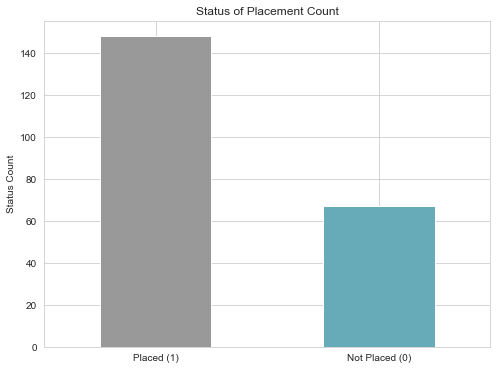

In [7]:
ax = model_data['status'].value_counts().plot(figsize=(8, 6), kind='bar', color=['#999999', '#68abb8'], width=0.5)

ax.set_xticklabels(['Placed (1)', 'Not Placed (0)'], rotation=0)
ax.set_title('Status of Placement Count')
ax.set_ylabel('Status Count');

**what insights can you get from the target distribution? how will this affect our model? (2pts)**

`There is an imbalance with regards to the target variable; thus, calculation of accuracy is not suggested. Moreover, the use of stratify for this target is still suggested so that both train and test datasets will have the same distribution for the splits.`

## Model Development

**drop the salary feature as part of the model for the classification problem and store the independent variables to X and the dependent variable to y (3pts)**

In [8]:
# drop the salary feature 
classif_model_data = model_data
classif_model_data.drop("salary", inplace=True, axis=1)

In [9]:
#store to X the features used for modeling (independent variables)
X = classif_model_data.drop(['hsc_s', 'degree_t', 'specialisation'], axis = 1)

#store to y our target (dependent variable)
y = classif_model_data['status']

In [10]:
#classif_model_data.columns
#classif_model_data.to_csv('data/classif_model_data.csv')
#classif_model_data.head()

**why were you asked to drop the salaray variable as part of the features used for modeling? (2pts)**

`Apart from not being used in this KNN classification, the salary of the student varies and it is not reliable for classfying test students. Also not placed students have null salary, we can easily label them if we include the salary feature but won't observe which features really defines their placement`

**import the necessary packages to run the KNN Classifier (1pt)** 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn import metrics

**do a train-test split wherein 70% of the data is used for training and 30% is used for testing (2pts)**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
for key in Counter(y_train).keys(): #/len(y_train)
    print(f"{key}, {Counter(y_train)[key]}, Normalized:{Counter(y_train)[key]/len(y_train)}")

0, 47, Normalized:0.31333333333333335
1, 103, Normalized:0.6866666666666666


In [14]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(150, 18)

(65, 18)

(150,)

(65,)

**build an initial KNN model and set the K to 3 and show the train & test accuracy (2 pts)**

In [15]:
range_k = range(1,4)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

metrics.accuracy_score(y_test,y_pred)
# result = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(result)
# result1 = metrics.classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)

0.8615384615384616

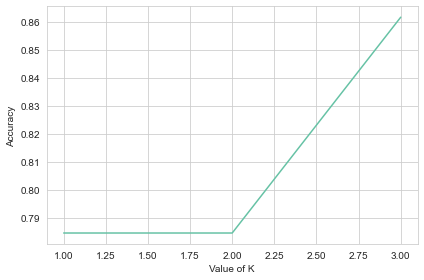

In [16]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.tight_layout()

**what do you observe in the accuracy of the train and test data, was there an increase/decrease in accuracy? what could be the reason as to why there was an increase/decrease? (3pts)**

`The accuracy fluctuates as the value of K changes the increase to 3 neighbors enhanced the searching algorithm of three neighbors to base the classification. Increasing it further from 3 may improve or not improve the classification as seen in the proof below`

**run knn using different k settings from 1 to 20 store the train and test accuracy for each iteration and do a line plot for the train & test accuracy (3pts)** 

In [17]:
range_k = range(1,21)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[11  9]
 [ 2 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.83      0.96      0.89        45

    accuracy                           0.83        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.83      0.83      0.82        65



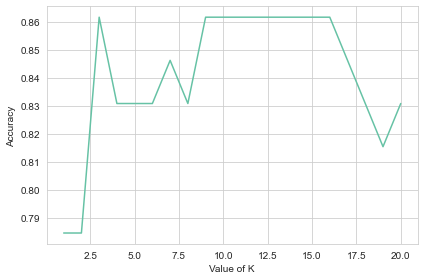

In [18]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.tight_layout()

**from the plot what would you recommend as the optimal k-setting to use & why? (3pts)**

`Even upon setting the range from 1 to 80, there will be an observed downward trend for the accuracy. Thus, the optimal k for this problem is 3 or between 9 to 16. This will satisfy the maximum accuracy of around 86` 

# Creating a Regression Model using Linear Regression

In this section you will create a Linear Regression model wherein the target is the salary feature. This means we are trying to forecast potential salary of a student when they are employed.

**From our initial anylsis we saw that our target feature has missing values, drop the missing values, we also don't need the status feature for the model so we drop this column also(2pts)**

In [19]:
new_model_data = model_data

In [20]:
new_model_data['salary'] = placement_df['salary']
new_model_data['sl_no'] = placement_df['sl_no']

In [32]:
new_model_data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'x0_Arts', 'x0_Commerce', 'x0_Science', 'x1_Comm&Mgmt', 'x1_Others',
       'x1_Sci&Tech', 'x2_Mkt&Fin', 'x2_Mkt&HR', 'salary', 'sl_no'],
      dtype='object')

In [22]:
new_model_data.head() #no need to drop status

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,x0_Arts,x0_Commerce,x0_Science,x1_Comm&Mgmt,x1_Others,x1_Sci&Tech,x2_Mkt&Fin,x2_Mkt&HR,salary,sl_no
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,270000.0,1
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,200000.0,2
2,0,65.00,1,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,250000.0,3
3,0,56.00,1,52.00,0,Science,52.00,Sci&Tech,0,66.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,4
4,0,85.80,1,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,425000.0,5


In [23]:
new_model_data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
x0_Arts            0
x0_Commerce        0
x0_Science         0
x1_Comm&Mgmt       0
x1_Others          0
x1_Sci&Tech        0
x2_Mkt&Fin         0
x2_Mkt&HR          0
salary            67
sl_no              0
dtype: int64

In [24]:
new_model_data = new_model_data.dropna(inplace=False)

**Plot the distribution of our target variable (2pts)**

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


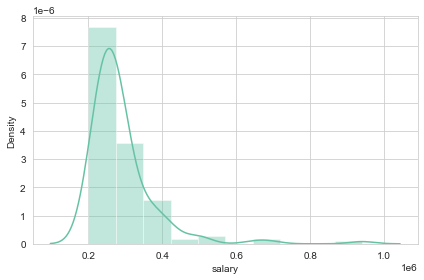

In [25]:
sns.distplot(new_model_data['salary'], bins=10)
plt.tight_layout()
plt.show()

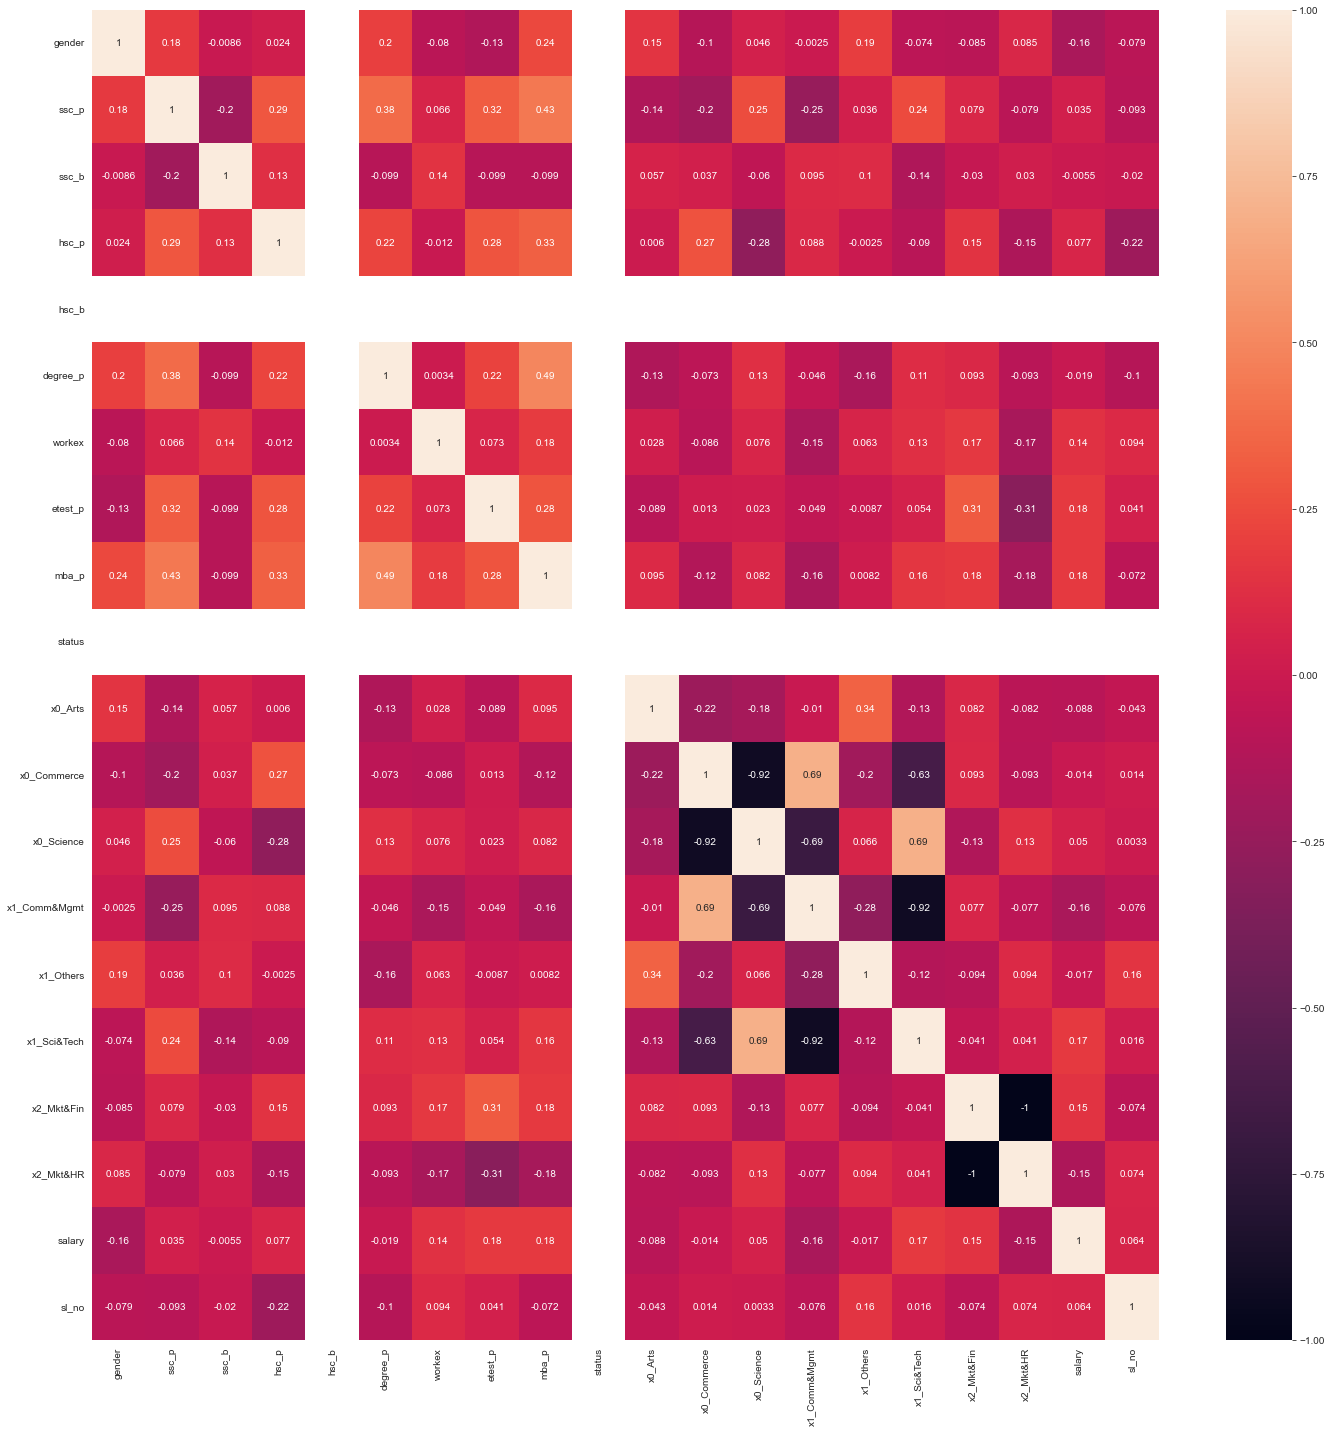

In [26]:
corr = new_model_data.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, ax=ax, annot=True)
plt.tight_layout()

`This heatmap provides that there is no significant correlation between any features in the dataframe. Thus, the forecast of potential salary can be modeled to have a dependent variable of x students as mentioned in the requirement.`

**what insights can you get from the target distribution? how will this affect our model? (2pts)**

`There is an observed salary density at around 200k to 300k. The model might deduce or forecast that a new student in this problem when employed has an expected salary of around 200k to 300k. However, this might not be the case due to the correlation above.`

## Model Development

**import the necessary packages to run Linear Regression (1pt)**

In [46]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

**do a train-test split wherein 70% of the data is used for training and 30% is used for testing (2pts)**

In [93]:
#store to X the features used for modeling (independent variables)
X = np.array(new_model_data['sl_no']).reshape(-1, 1)
#store to y our target (dependent variable)
y = np.array(new_model_data['salary']).reshape(-1, 1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**build linear regression model and show the train & test r2 score (2 pts)**

In [90]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.011270895985490692


In [102]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[54.78397033]]
Mean squared error: 6111047006.02
Coefficient of determination: 0.01


**What can be interpreted from the R-squared score? (2pts)**

`The r-squared score is very low which means that there is no correlation between the students and their salary when they are employed. As observed in the graphs below and the MSE, there are outliers that caused the errors to be larger.`

**Plot (??the coeffiecients of??) the linear regression model (2pts)**

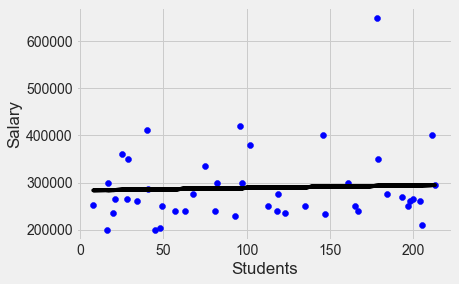

In [106]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Students")
plt.ylabel("Salary")
plt.show()

**From the plot, what kind of insights are you able to derive? Can these insights be trusted based on the R2 score? Why or why not? (4pts)**

`This cannot be trusted as salary is dependent on many different factors. The insights derived based on r-squared being too low is trustworthy as it dictates that the data can be further improved by removing the outliers and increasing the dataset to have more students to be analyzed`